# Introduction...

# 1. Flux Balance Analysis Process using Cobra Overview

## 1.1  Cobra FBA of _E. coli's_ Metabolism


Experiment ID: e2609573-7e07-11eb-9e97-f834416ad528
Created: 03/05/2021 at 15:09:49
Completed in 0.454828 seconds


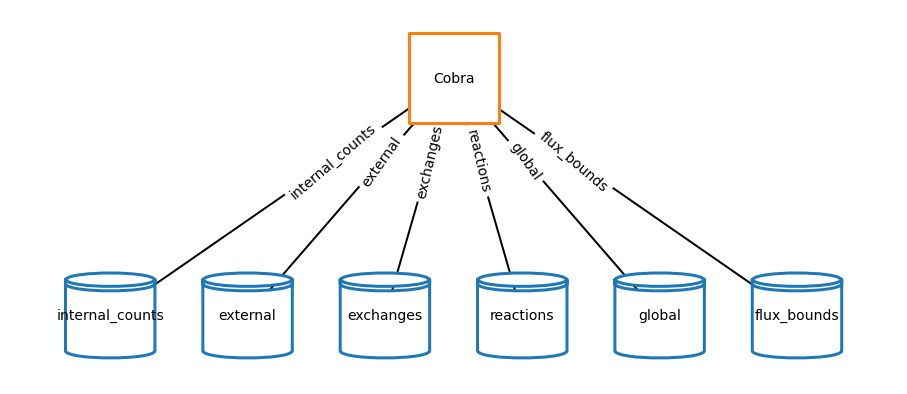

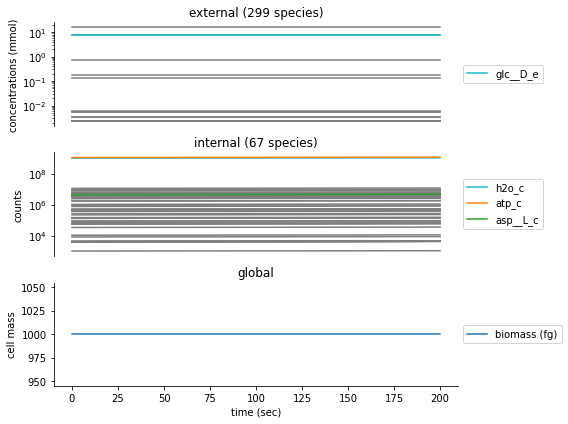

In [1]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_cobra
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

#Simulate Cobra
cobra_timeseries, cobra = simulate_cobra(total_time = 200)

#Plot the Simulation Topology
fig_topology = plot_topology(cobra)

#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)

## 1.2 Adding a Derivers to Update Biomass and Volume


Experiment ID: e809d1fc-7e07-11eb-9c43-f834416ad528
Created: 03/05/2021 at 15:09:58
Completed in 8.57 seconds


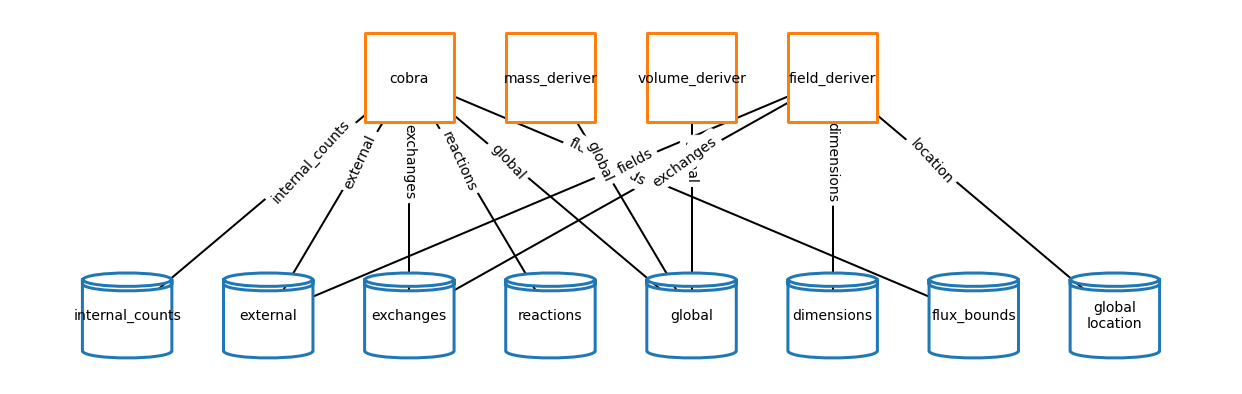

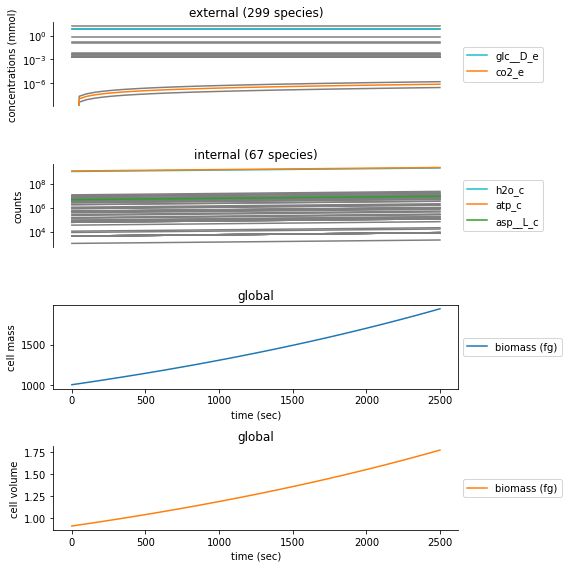

In [2]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_cobra_composite
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

#Simulate Cobra Composite
cobra_timeseries, cobra_composite = simulate_cobra_composite(total_time = 2500)

#Plot the Topology
fig_topology = plot_topology(cobra_composite)

#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)

# 2. Chemical Reaction Networks with Bioscrape Overview

## 2.1 A Deterministic Bioscrape Simulation of the Lac Operon CRN


Experiment ID: efe0da84-7e07-11eb-9a33-f834416ad528
Created: 03/05/2021 at 15:10:11
Completed in 0.184510 seconds


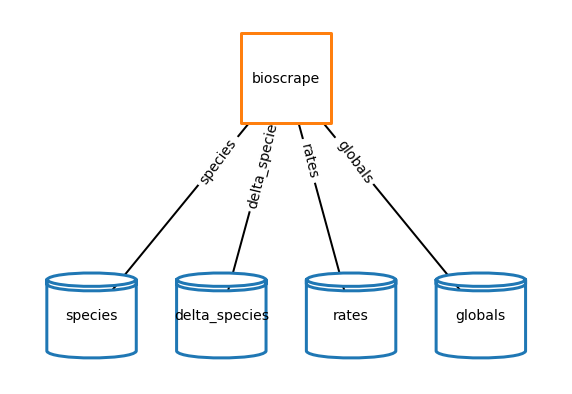

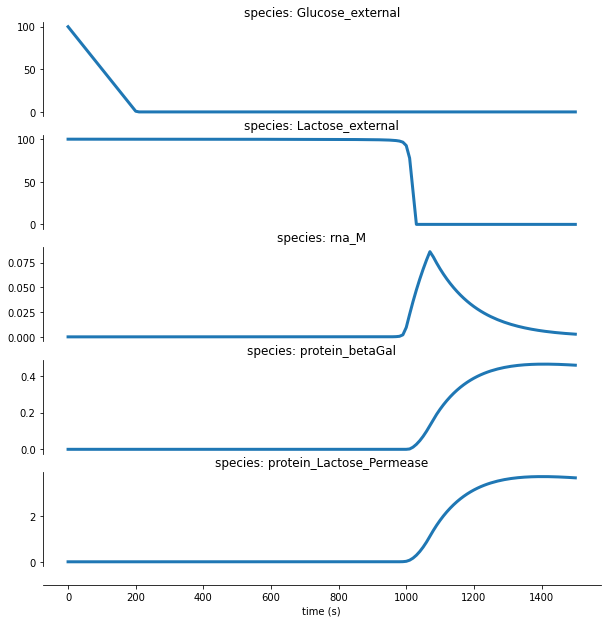

In [3]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Deterministically
bioscrape_timeseries, bioscrape_composite = simulate_bioscrape(
    total_time = 1500, initial_glucose = 5, initial_lactose = 10)

#plot the Topology
fig_topology = plot_topology(bioscrape_composite)

#Plot the CRN Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries, 
    variables = species_to_plot
)

## 2.2 A Stochastic Bioscrape Simulation of the Lac Operon CRN


Experiment ID: f074449a-7e07-11eb-bf8f-f834416ad528
Created: 03/05/2021 at 15:10:12
Completed in 1.37 seconds


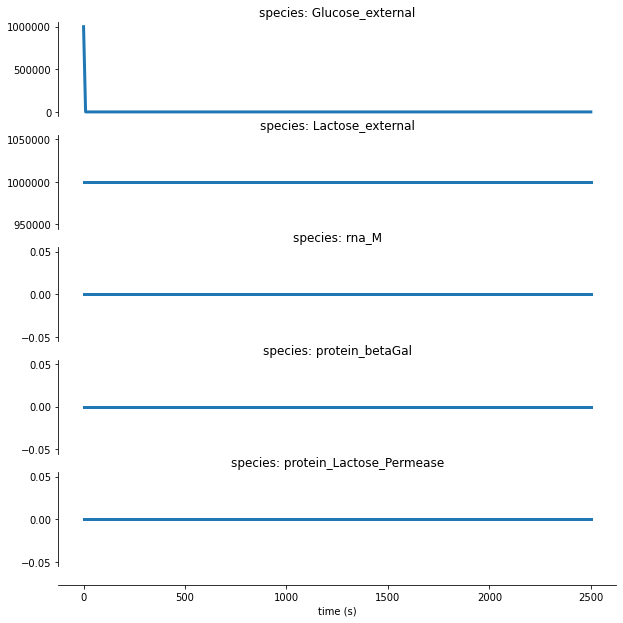

In [4]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Stochastically
bioscrape_timeseries, bioscrape_composite = simulate_bioscrape(
    total_time = 2500, stochastic = True, initial_glucose = 10**6, initial_lactose = 10**6)

#Plot a Stochastic Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries, 
    variables = species_to_plot
)

# 3. Multibody and Spatial Simulations

## 3.1 Growing and Dividing Cells


Experiment ID: f1b9b0b6-7e07-11eb-aa90-f834416ad528
Created: 03/05/2021 at 15:10:15
Completed in 0.722076 seconds


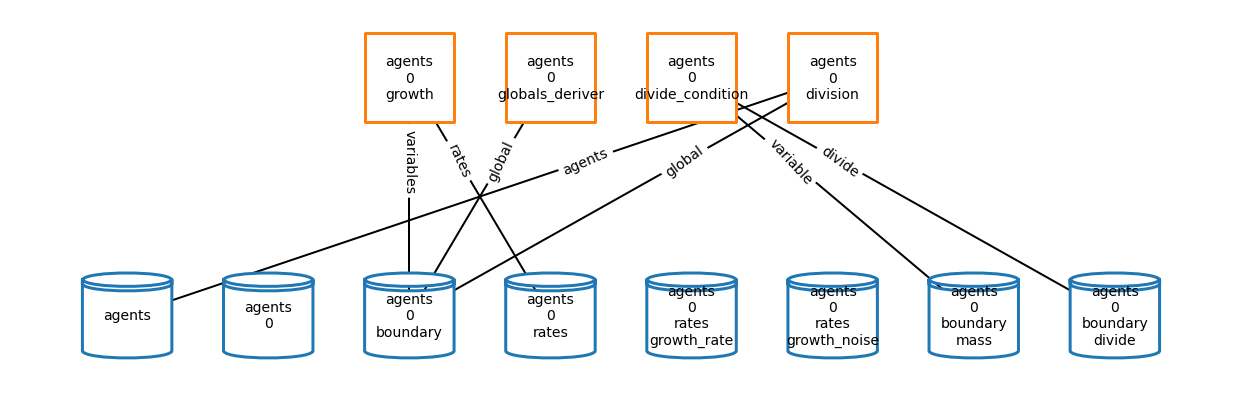

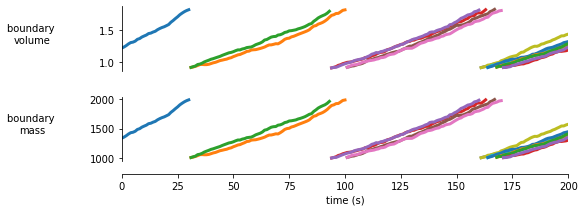

In [5]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_grow_divide
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_multigen

#Simulate Growing, Dividing Cells
grow_divide_timeseries, grow_divide_composite = simulate_grow_divide(
    total_time = 200, growth_rate = .01, growth_noise = .005)

#Plot Topology
fig_topology = plot_topology(grow_divide_composite)

#Plot Cell Trajectories
fig_trajectories = plot_multigen(grow_divide_timeseries, variables = [("boundary", "mass"), ("boundary", "volume")])

## 3.2 A Lattice Model of Diffusion


Experiment ID: f2b385a8-7e07-11eb-b33e-f834416ad528
Created: 03/05/2021 at 15:10:16
Completed in 0.760850 seconds


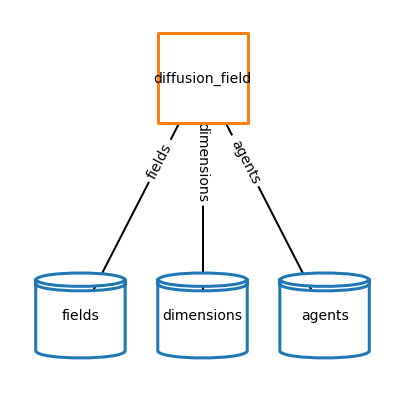

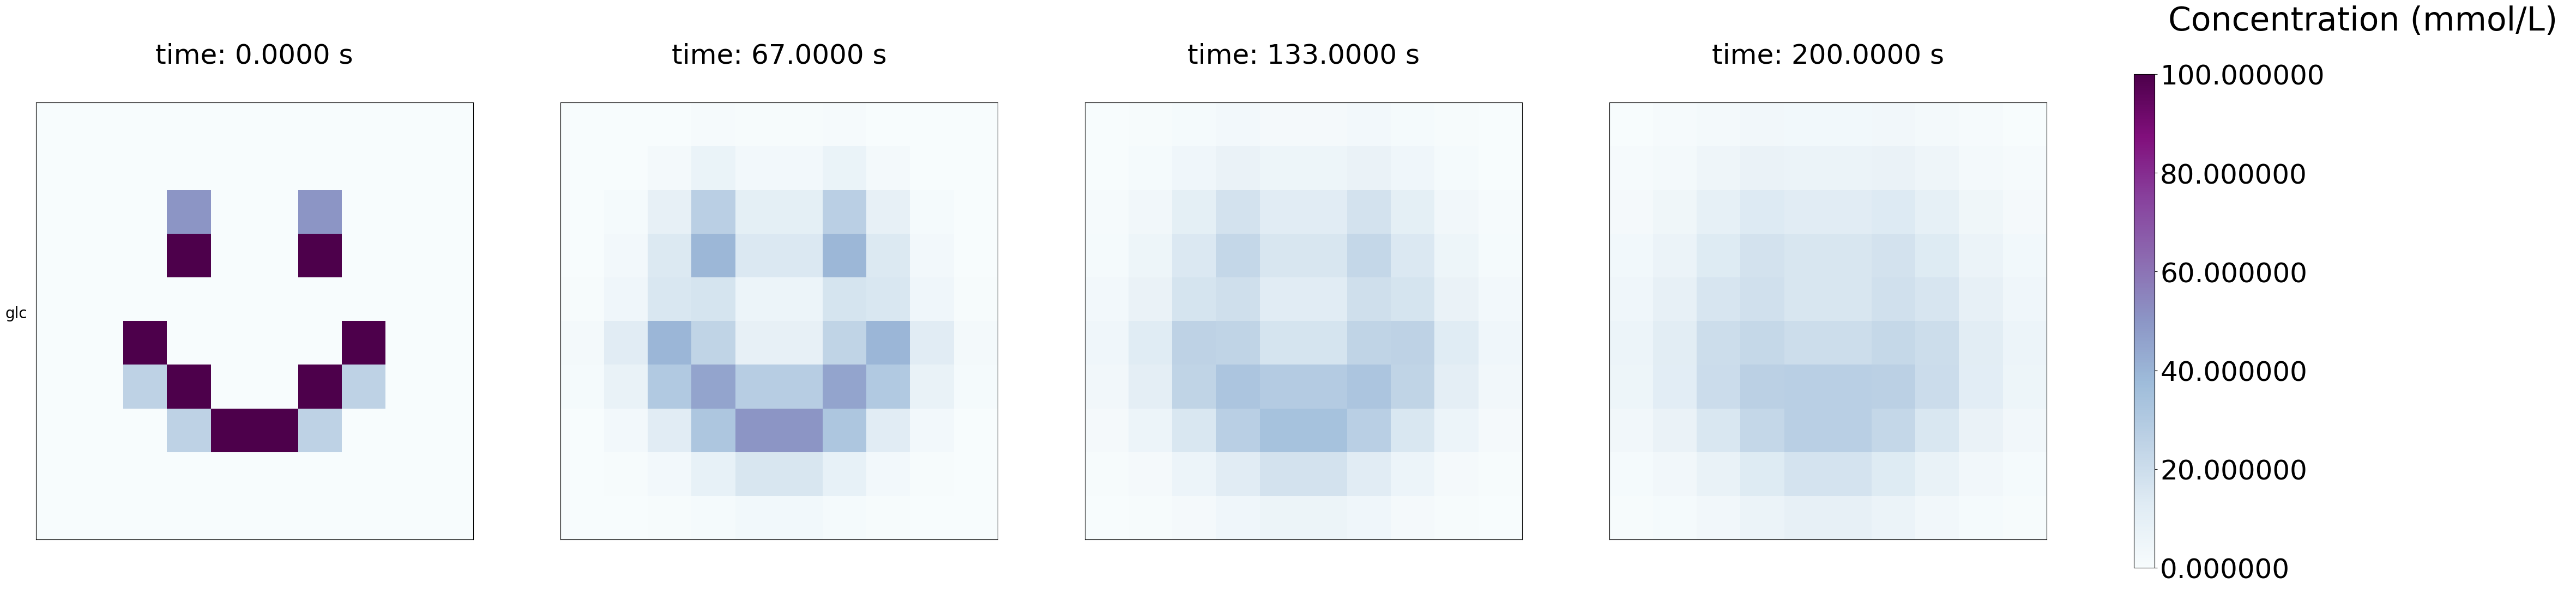

In [6]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_diffusion
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np
import matplotlib as plt

#Grid Size
N = 10
bounds = [N, N]

#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[3, 6] = 100
initial_state[3, 7] = 50
initial_state[6, 6] = 100
initial_state[6, 7] = 50
initial_state[2, 4] = 100
initial_state[2, 3] = 25
initial_state[3, 3] = 100
initial_state[3, 2] = 25
initial_state[4, 2] = 100
initial_state[5, 2] = 100
initial_state[6, 2] = 25
initial_state[6, 3] = 100
initial_state[7, 3] = 25
initial_state[7, 4] = 100

#Simulate diffusion
diffusion_data, diffusion_composite = simulate_diffusion(
    total_time = 200, 
    initial_state = initial_state, 
    bounds = bounds,
    diffusion_rate = .005)

#Plot Topology
fig_topology = plot_topology(diffusion_composite)

#Reformat Data
agents, fields = format_snapshot_data(diffusion_data)

#Plot Simulation Snapshots
fig2 = plot_snapshots( 
    bounds=bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4
)


## 3.3 Placing Agents on the Lattice


Experiment ID: f42265e2-7e07-11eb-bf81-f834416ad528
Created: 03/05/2021 at 15:10:19
Completed in 5.30 seconds


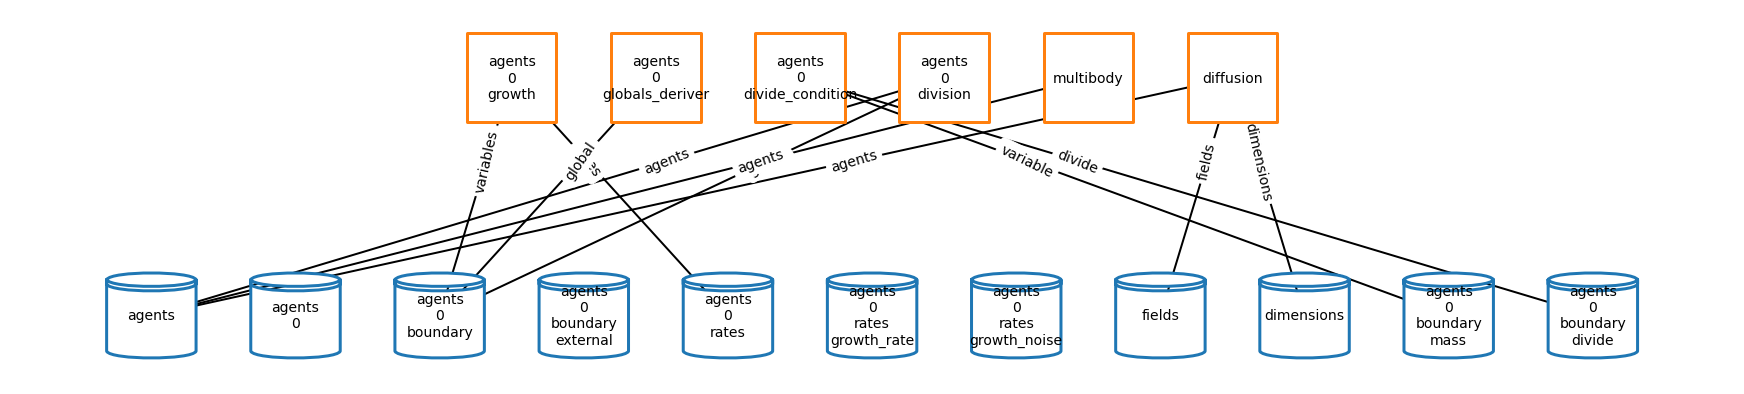

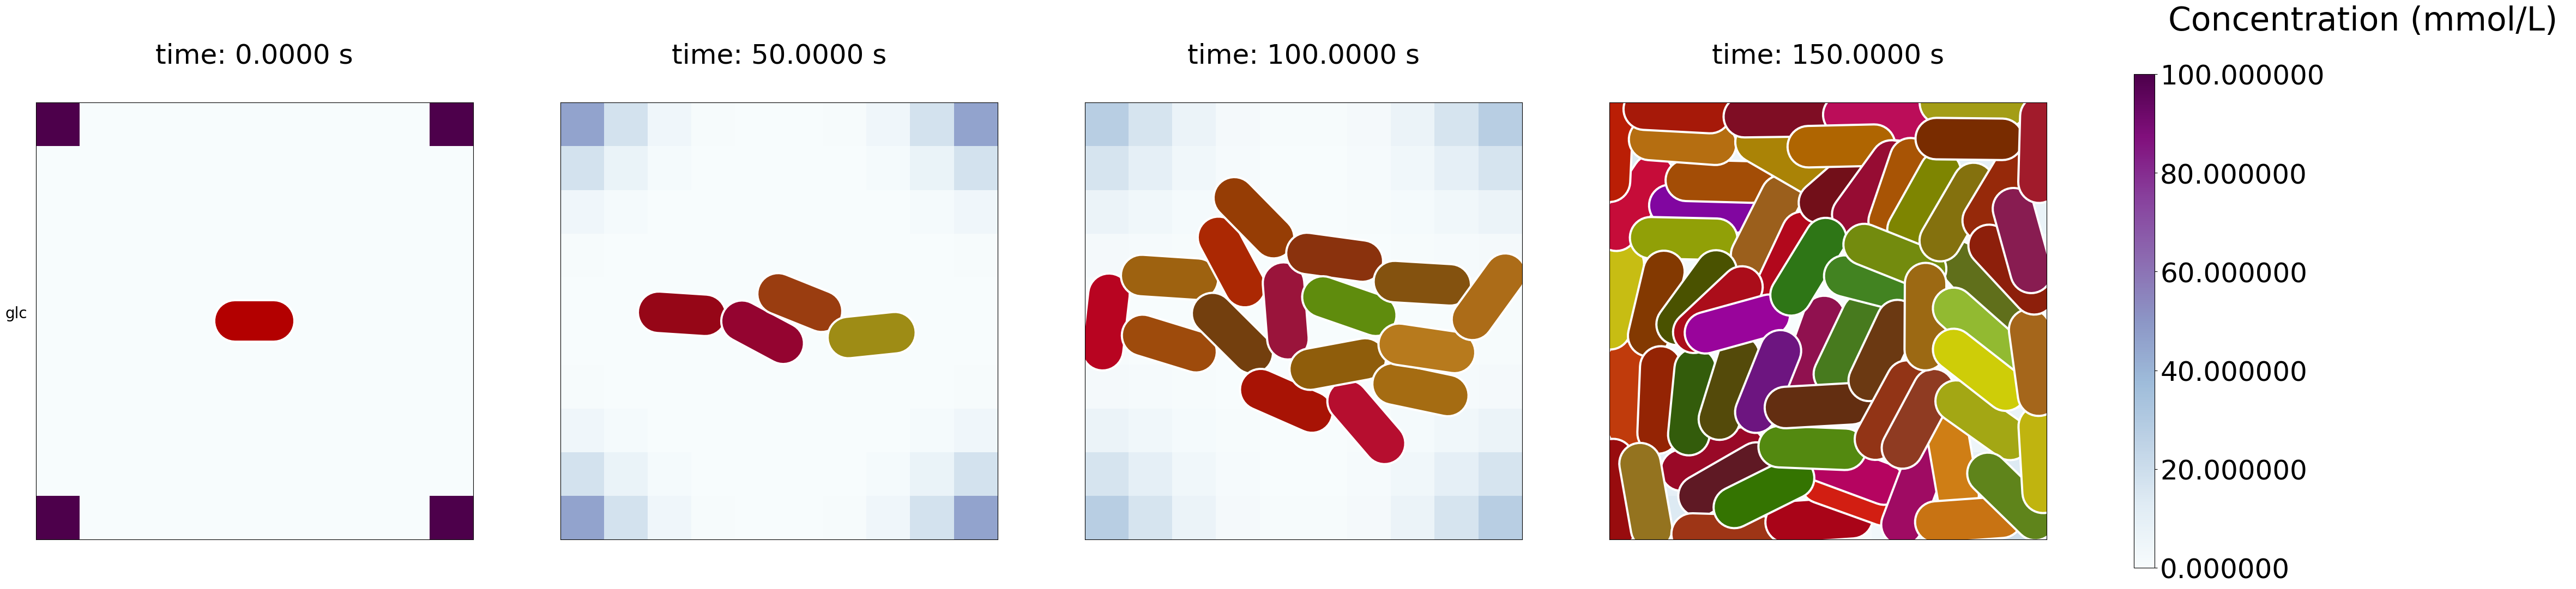

In [7]:
from bioscrape_cobra.simulate import simulate_grow_divide_lattice, get_lattice_grow_divide_composite
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np

#Grid Size
N = 10
bounds = [N, N]
#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[0, 0] = 100
initial_state[0, -1] = 100
initial_state[-1, 0] = 100
initial_state[-1, -1] = 100

#Create the a Composite with Agents (Cells) on a Lattice
lattice_grow_divide_composite = get_lattice_grow_divide_composite(
    bounds = bounds, 
    initial_concentration = initial_state,
    diffusion_rate = .01)


try:
    #Plot the topology
   
    fig_topology = plot_topology(lattice_grow_divide_composite)
except IndexError or KeyError:
    print(f"!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n{lattice_grow_divide_composite}!!!!!!!!!!!!!!!!!!")
    raise
    

#Simulate the Composite
lattice_grow_divide_data = simulate_grow_divide_lattice(lattice_grow_divide_composite, total_time = 150)

#Plot snapshots of the simulation
agents, fields = format_snapshot_data(lattice_grow_divide_data)

fig2 = plot_snapshots( 
    bounds=bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4
)

# 4. Connecting Bioscrape and COBRA in Lineage of Growing and Dividing cells on a Lattice.

## 4.1 Bioscrape and COBRA in a Single Deterministic Cell


Experiment ID: deterministic
Created: 03/05/2021 at 15:10:33


C:\Users\wp_ix\miniconda3\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 10.51 seconds


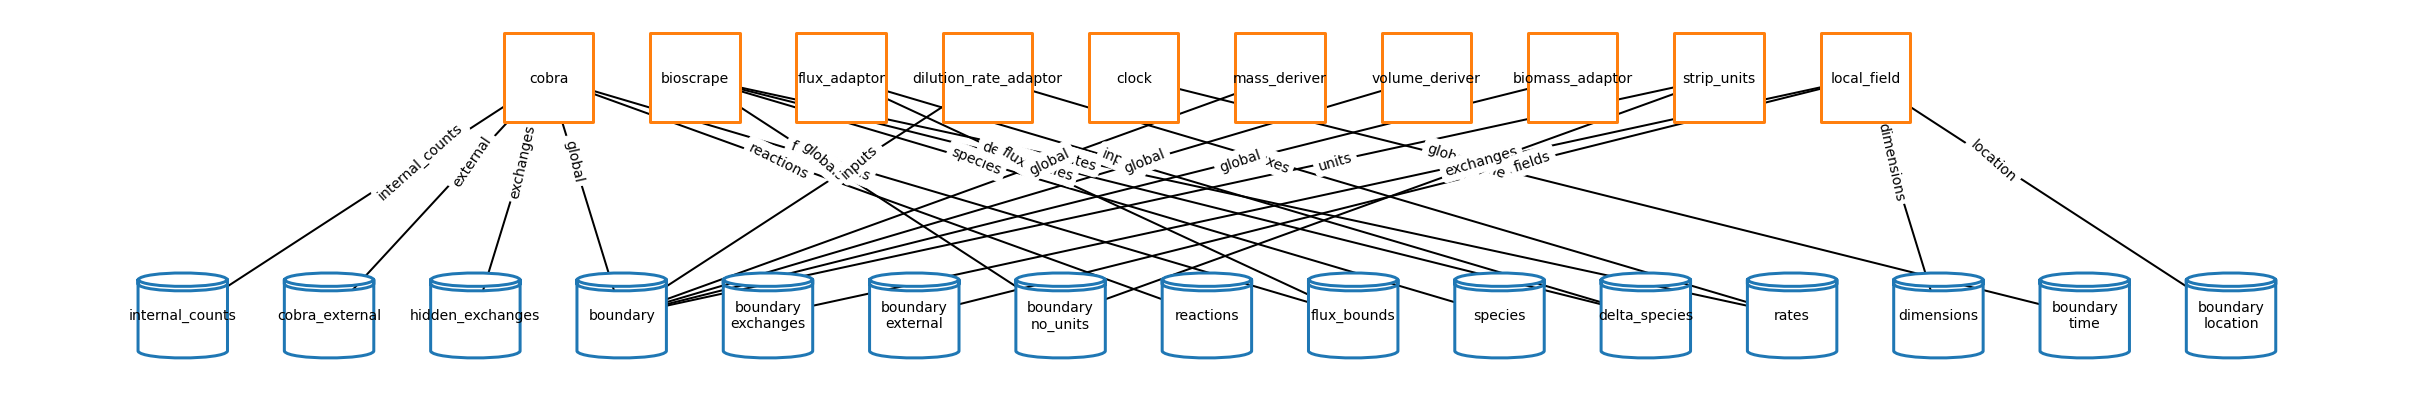

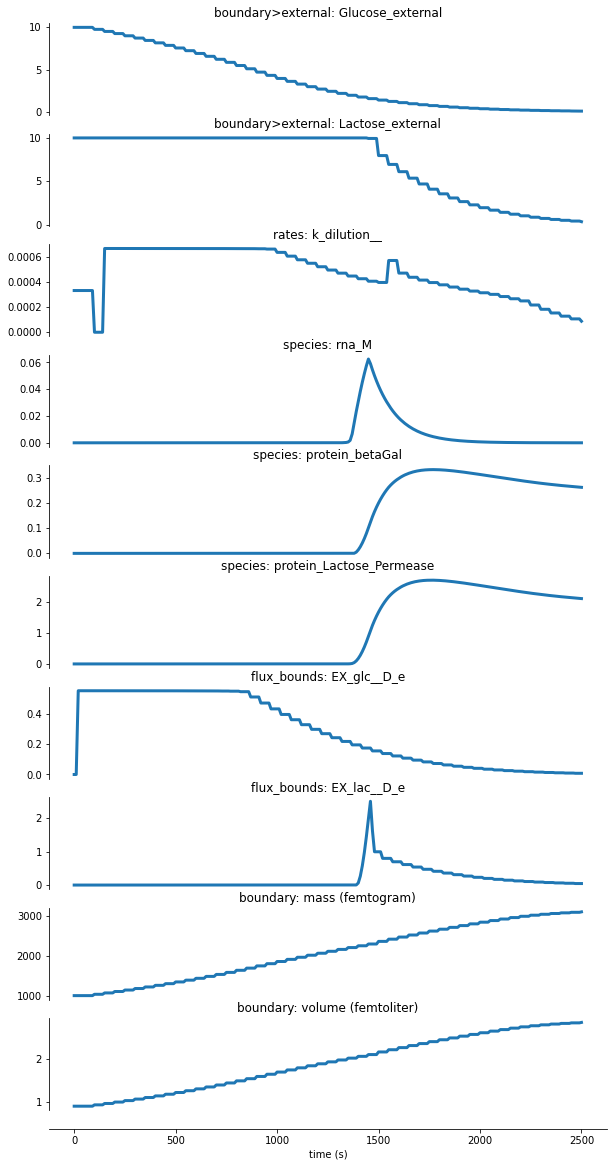

In [8]:
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_single
from vivarium.plots.topology import plot_topology

from bioscrape_cobra import helper

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
bsc_composite = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config())

try:
    settings = {
        'coordinates':{
            'cobra': (0, 0),
            'bioscrape':(0, 1),
            'flux_adaptor':(0, 2),
            'dilution_rate_adaptor':(0, 3),
            'volume_deriver':(0, 4),
            'clock':(0, 5),
            'mass_deriver':(0, 6),
            'biomass_adaptor':(0, 7),
            'strip_units': (0, 8),
            'local_field': (0, 9)
        }
    }
    fig_topology = plot_topology(bsc_composite)
except:
    print(f"!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n\n\n!!!!!!!!!!!!!!!!!!\n")
    d = bsc_composite.generate()
    print("Processes:")
    for p in d["processes"]:
        print(p, d["processes"][p])
    print("\nTopology:")
    for t in d["topology"]:
        print(t, d["topology"][t])
    
#Simulate
biocobra_data = simulate_bioscrape_cobra(
    initial_glucose=5, #mM
    initial_lactose=10, #mM
    total_time = 2500, 
    output_type='timeseries')
fig_data = plot_single(biocobra_data, variables = plot_variables_list_deterministic)

## 4.2 Bioscrape and COBRA in a Single Stochastic Cell


Experiment ID: stochastic
Created: 03/05/2021 at 15:10:54


C:\Users\wp_ix\miniconda3\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 278.70 seconds


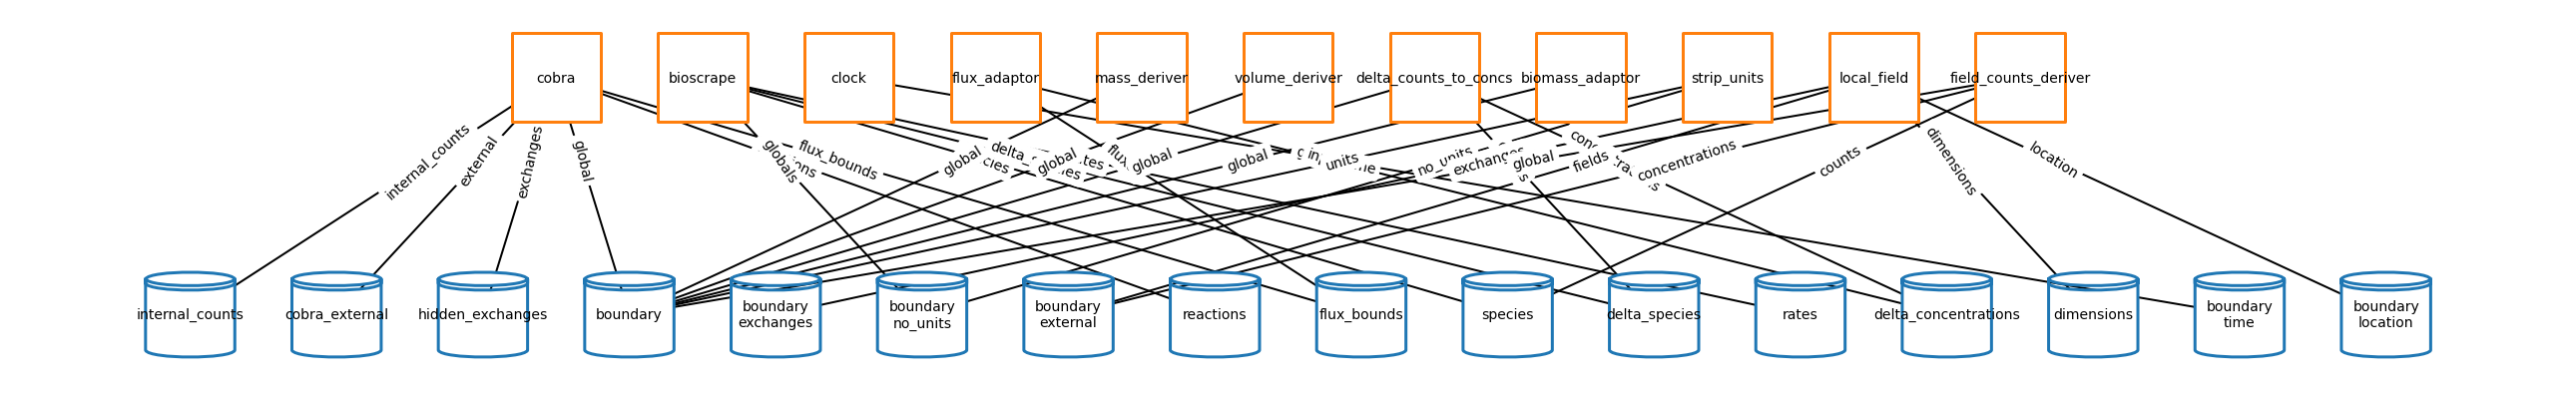

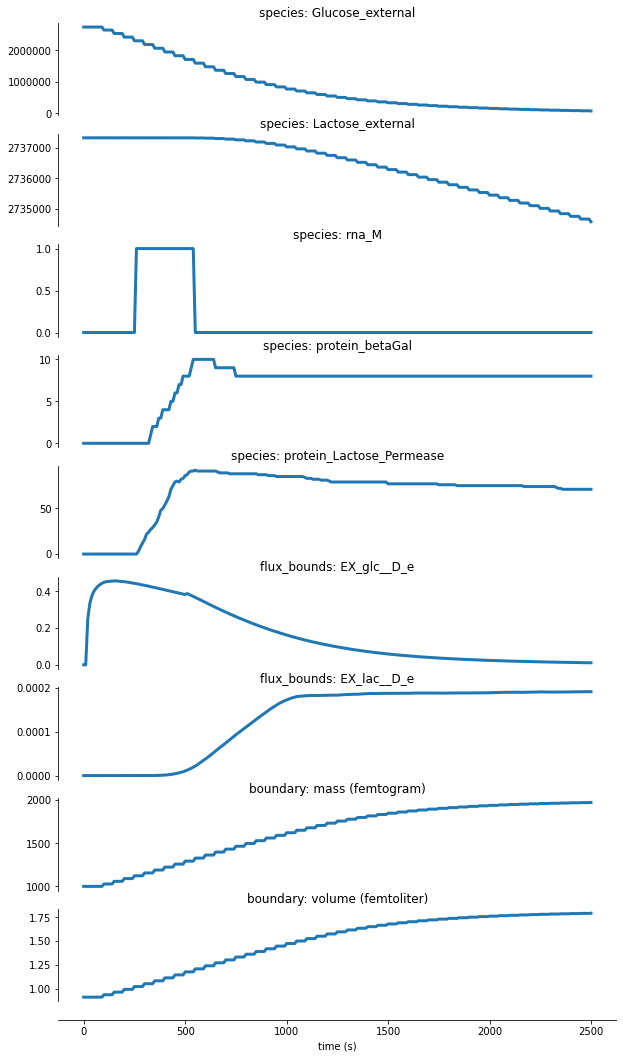

In [9]:
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_stochastic
from bioscrape_cobra.plot import plot_single
from vivarium.plots.topology import plot_topology

from bioscrape_cobra import helper

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
bsc_composite = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config())

try:
    fig_topology = plot_topology(bsc_composite)
except:
    print(f"!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n{bsc_composite}\n\n!!!!!!!!!!!!!!!!!!\n")
    
#Simulate
biocobra_data = simulate_bioscrape_cobra(
    initial_glucose=5, #concentration
    initial_lactose=10, #concentration
    total_time = 2500, 
    output_type='timeseries',
    stochastic = True)
fig_data = plot_single(biocobra_data, variables = plot_variables_list_stochastic)

## 4.3 Bioscrape and COBRA in an Lineage of Deterministic Cells


Experiment ID: deterministic_division
Created: 03/05/2021 at 15:15:40
Completed in 8.51 seconds
Completed in 30.67 seconds
Completed in 58.11 seconds


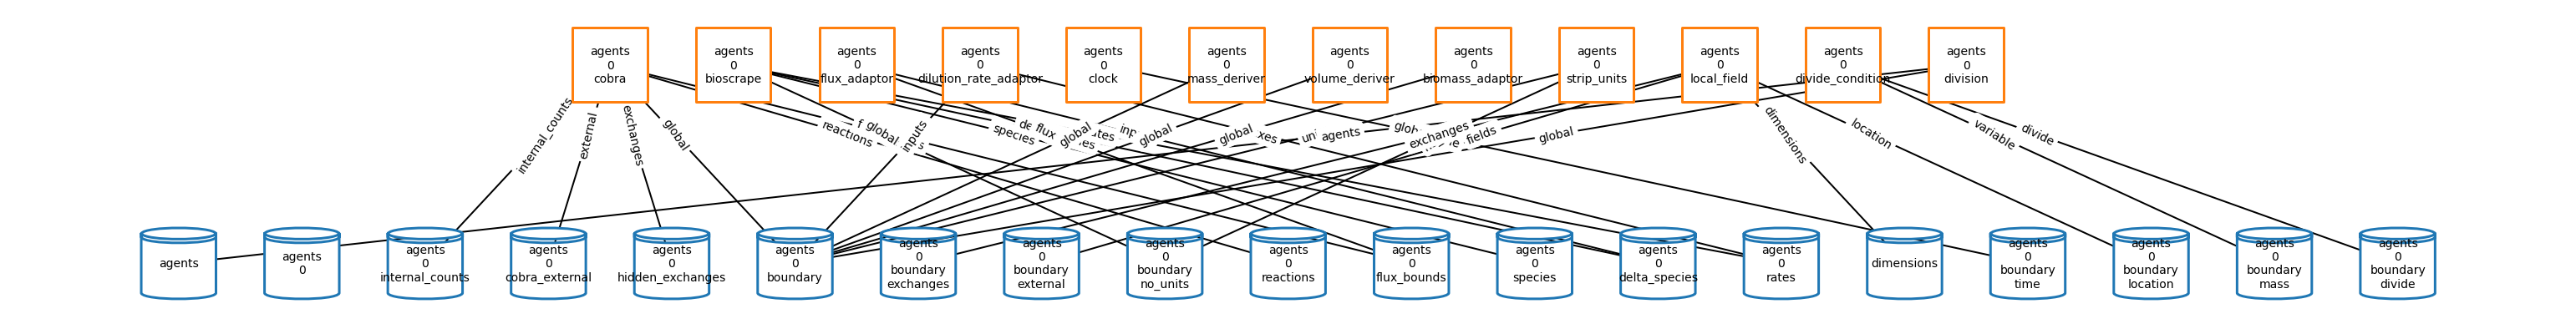

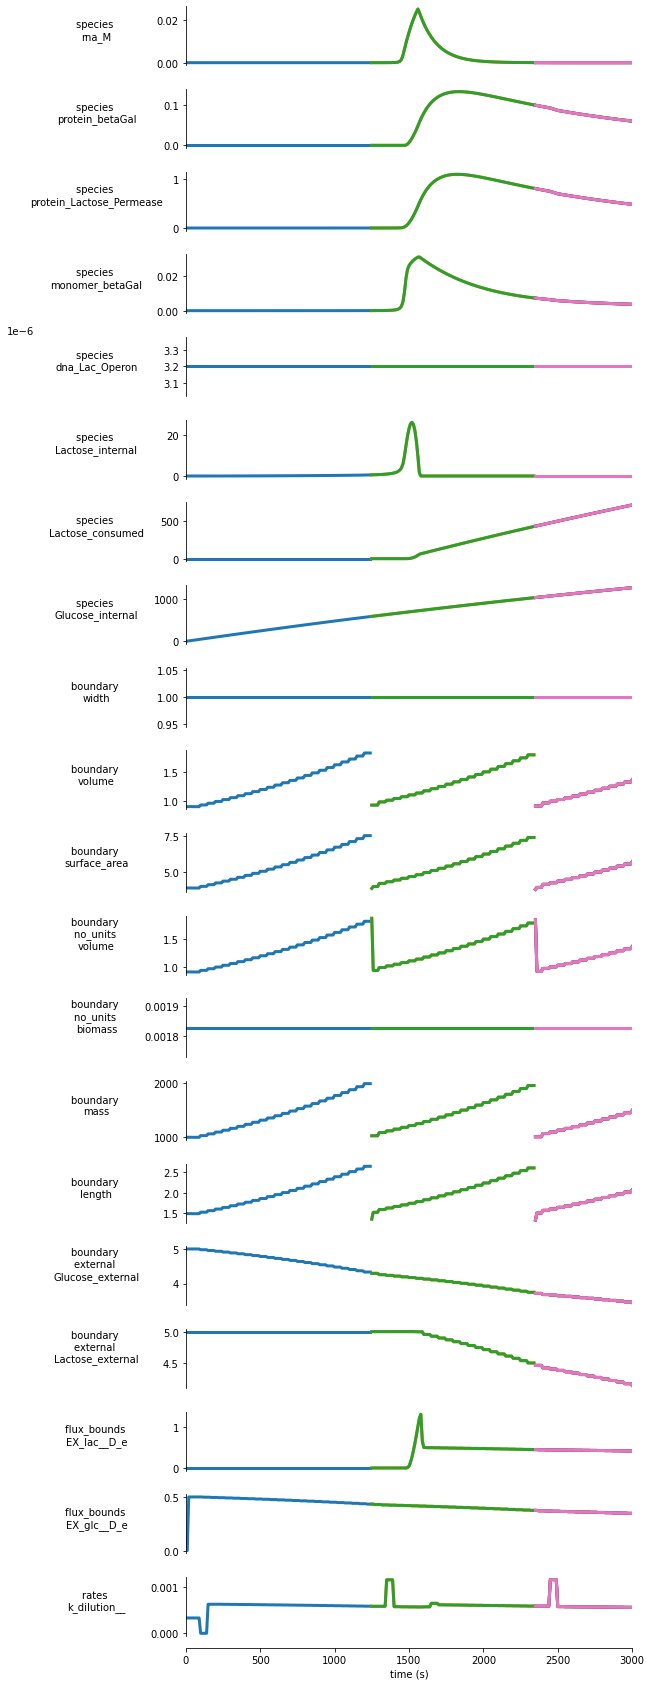

In [10]:
%matplotlib inline
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_multigen
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

from bioscrape_cobra import helper

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
bsc_composite = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config(division = True))

try:
    fig_topology = plot_topology(bsc_composite.generate(path=('agents', "0")))
except:
    print(f"!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n{bsc_composite}\n\n!!!!!!!!!!!!!!!!!!\n")
    raise
    
#Simulate
biocobra_data = simulate_bioscrape_cobra(
    total_time = 2500,
    initial_glucose=5, #mM
    initial_lactose=10, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #maximum total cells to simulate
    output_type='unitless', 
    division = True)

#plot the simulation
fig_data = plot_multigen(biocobra_data)

## 4.4 Bioscrape and COBRA in an Lineage of Stochastic Cells


Experiment ID: stochastic_division
Created: 03/05/2021 at 16:48:36
Completed in 1206.77 seconds
Completed in 2294.92 seconds
Completed in 2197.38 seconds


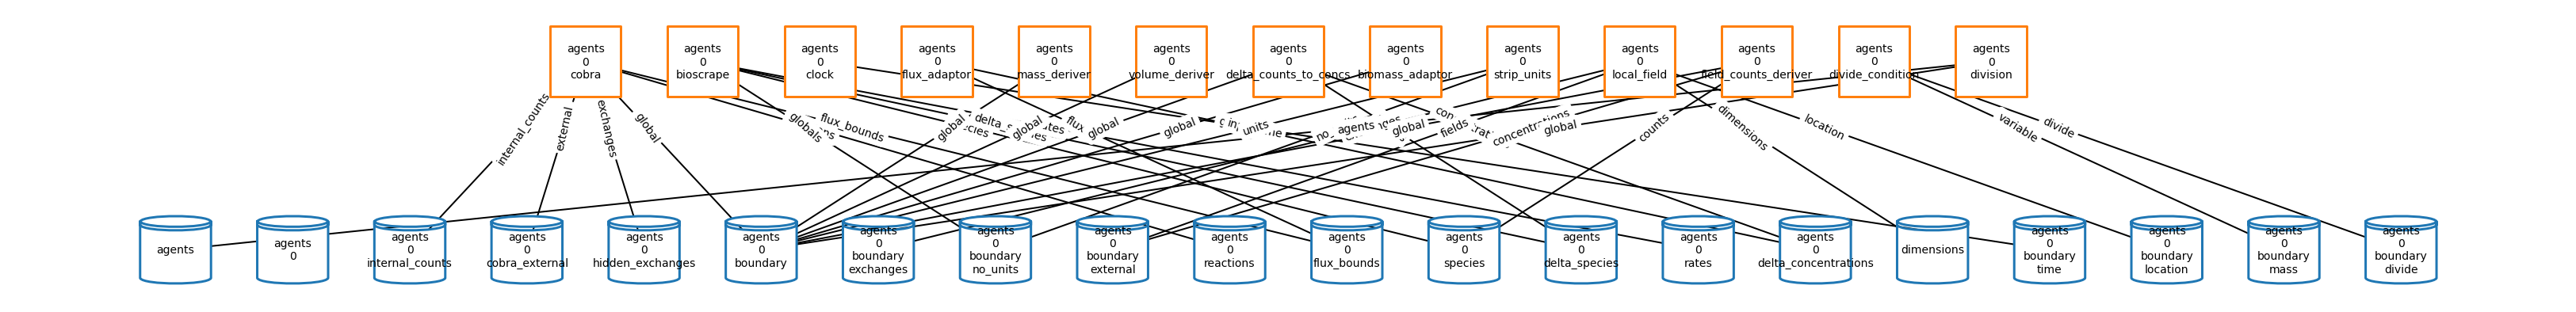

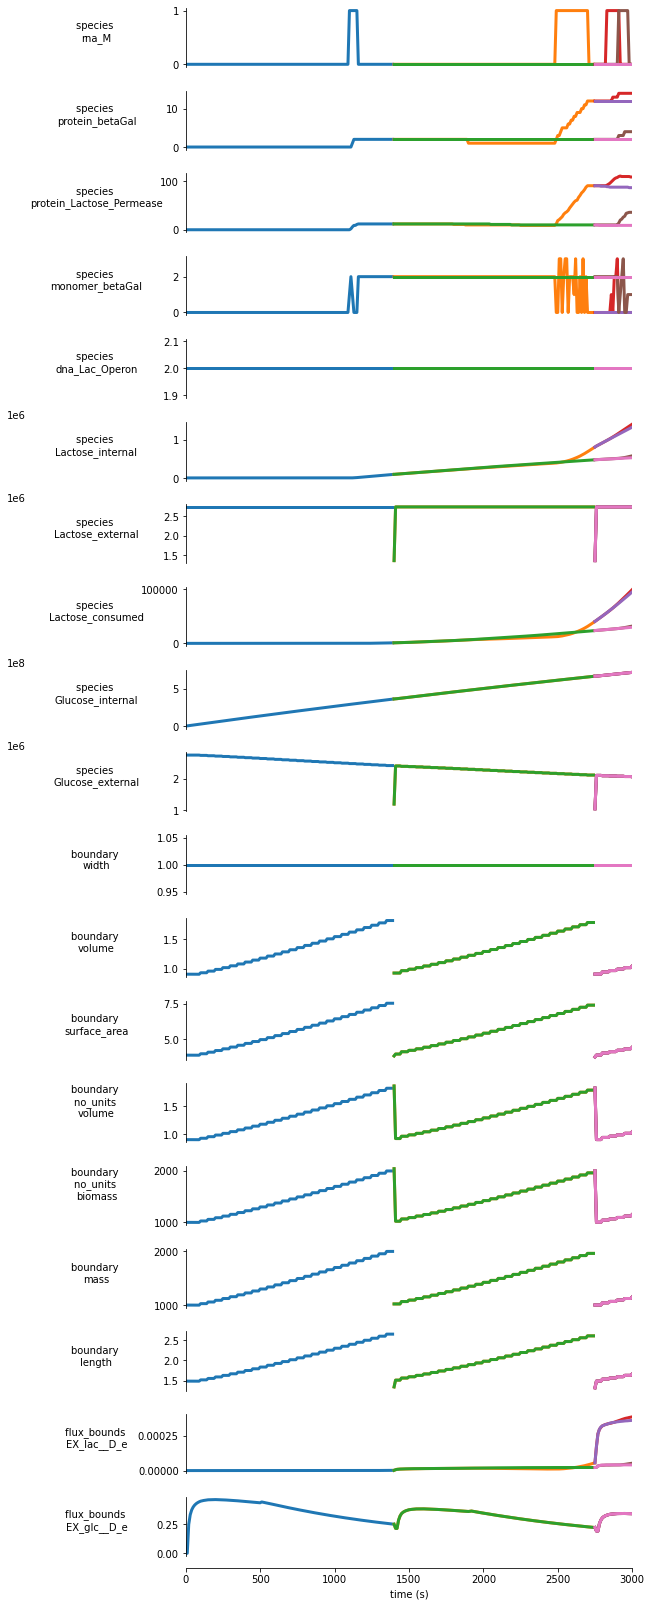

In [13]:
%matplotlib inline
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_stochastic
from bioscrape_cobra.plot import plot_multigen
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
bsc_composite = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config(division = True))

try:
    fig_topology = plot_topology(bsc_composite.generate(path=('agents', "0")))
except:
    print(f"!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n{bsc_composite}\n\n!!!!!!!!!!!!!!!!!!\n")
    
#Simulate
biocobra_data = simulate_bioscrape_cobra(
    total_time = 4000,
    initial_glucose=5, #mM
    initial_lactose=5, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #maximum total cells to simulate
    output_type='unitless', 
    division = True,
    stochastic = True)

#Plot the Simulation
fig_data = plot_multigen(biocobra_data)

## 4.5 Bioscrape and COBRA in an Lineage of Deterministic Cells on a Lattice

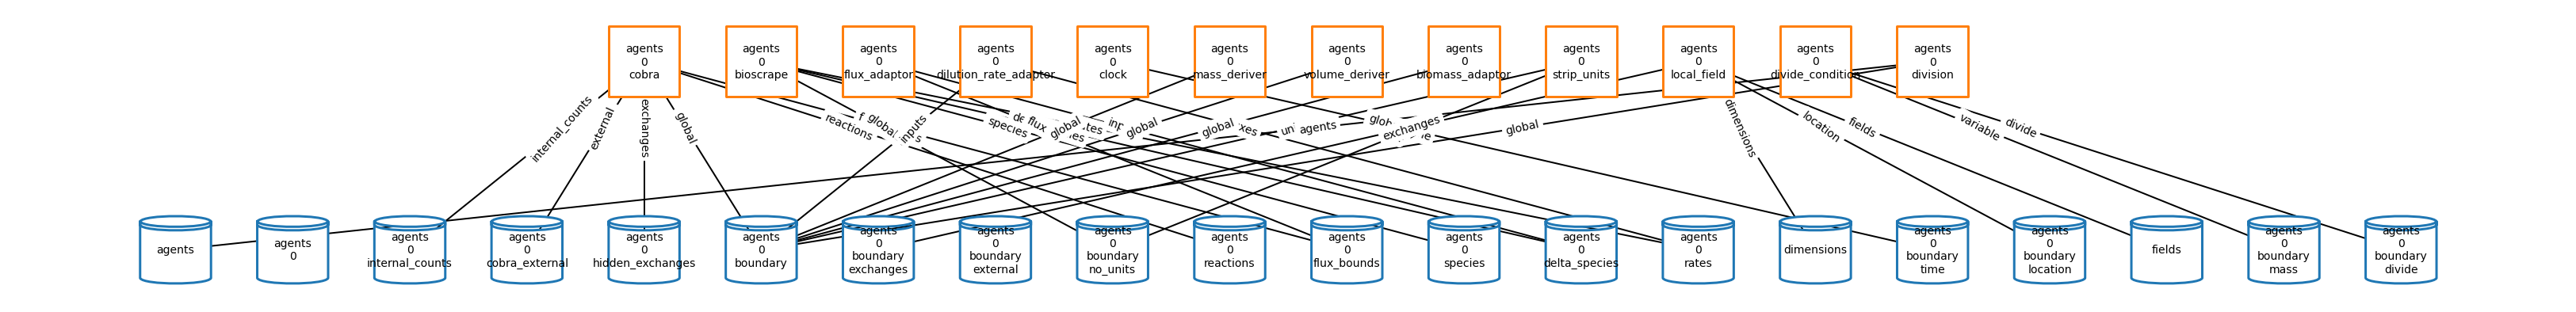


Experiment ID: deterministic_division_spatial
Created: 03/05/2021 at 18:24:24
Completed in 71.11 seconds
Completed in 56.72 seconds


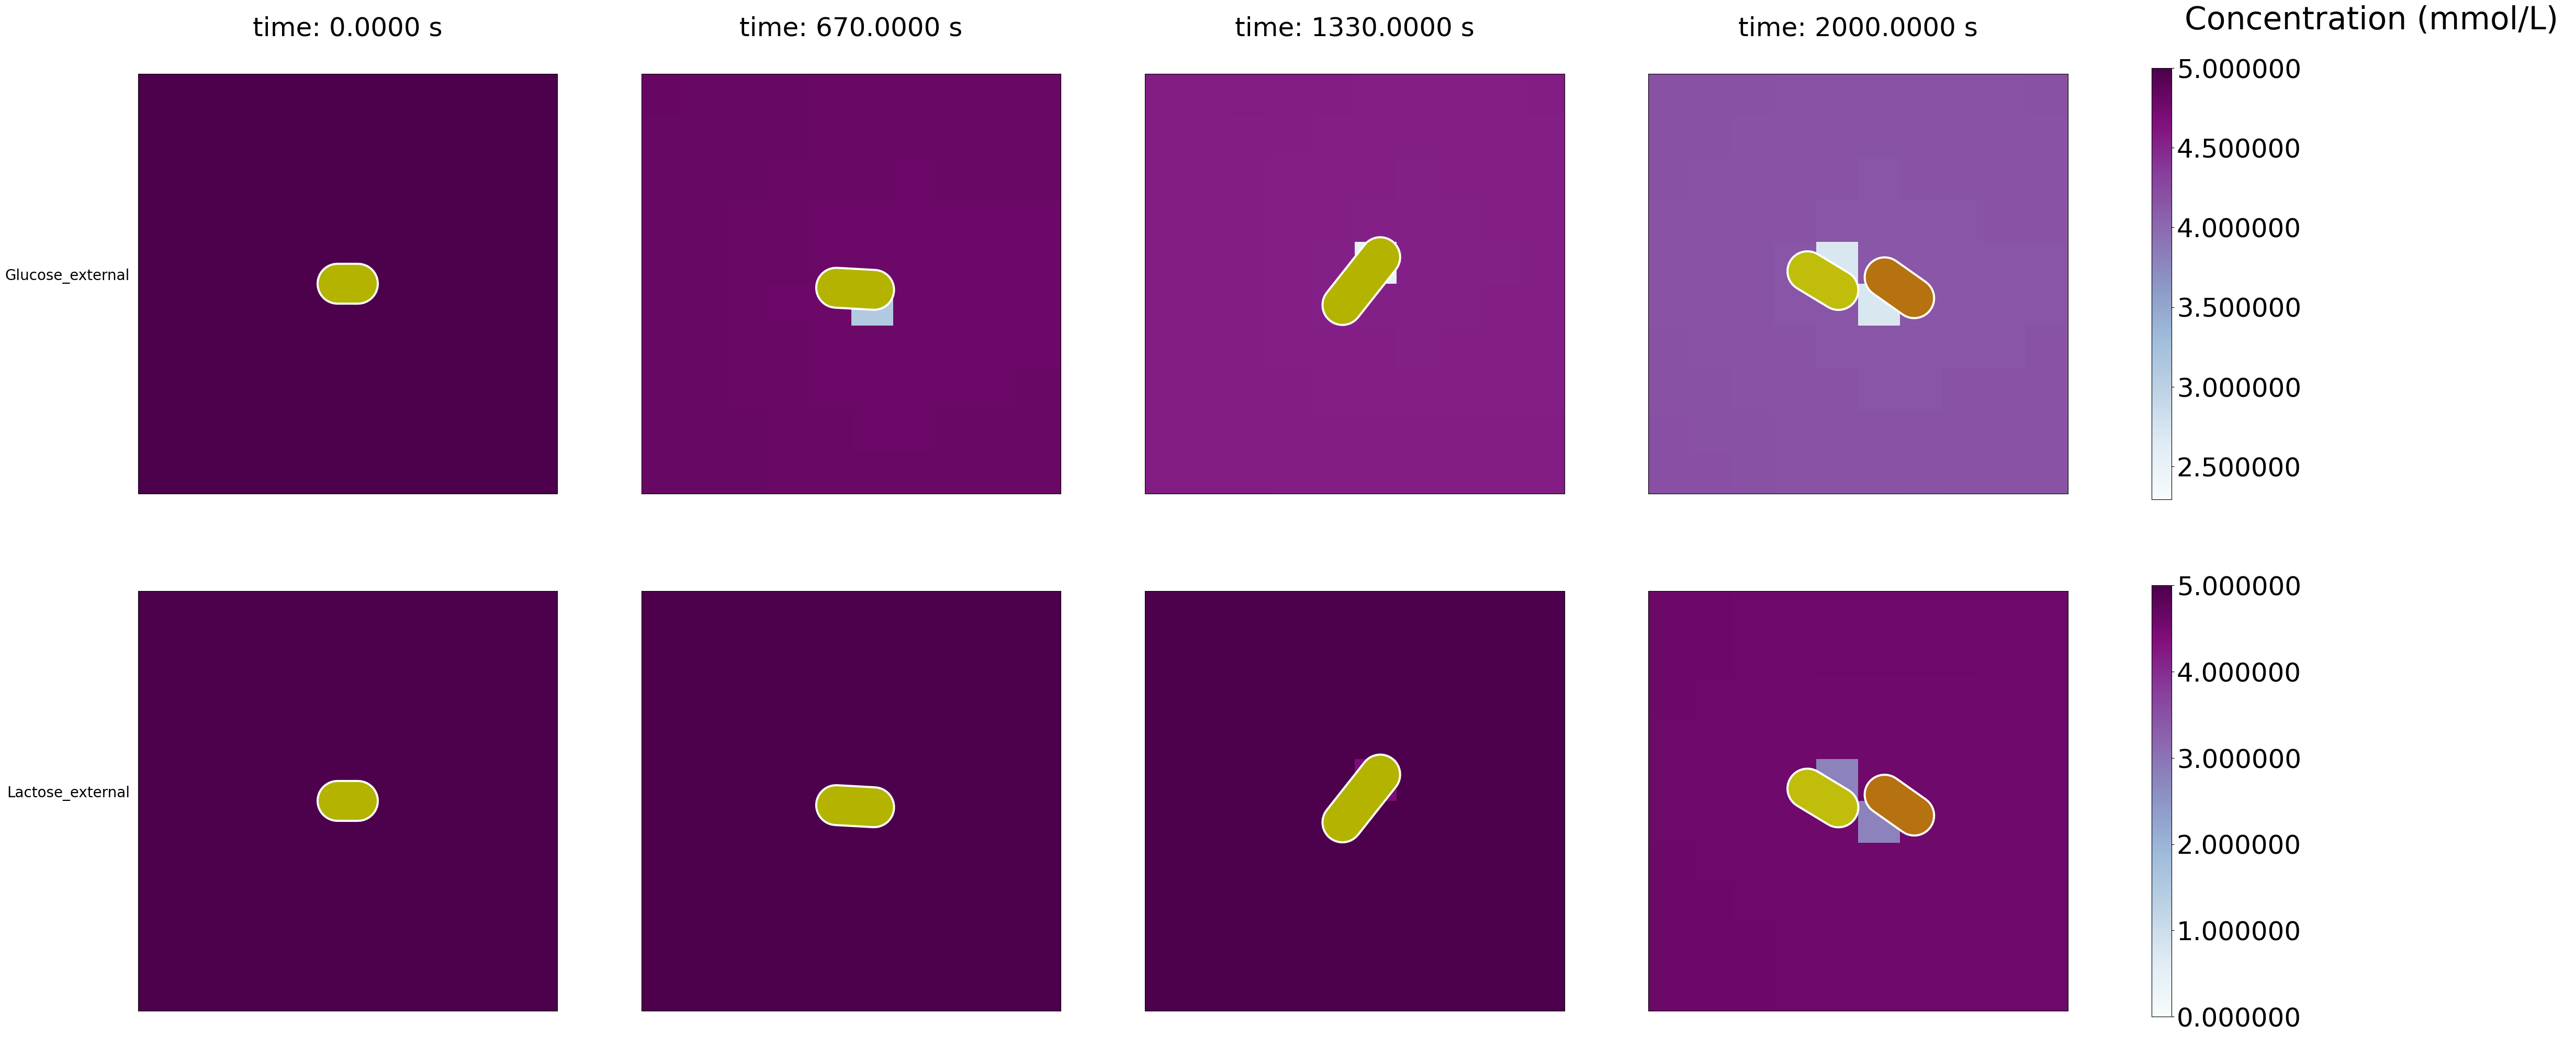

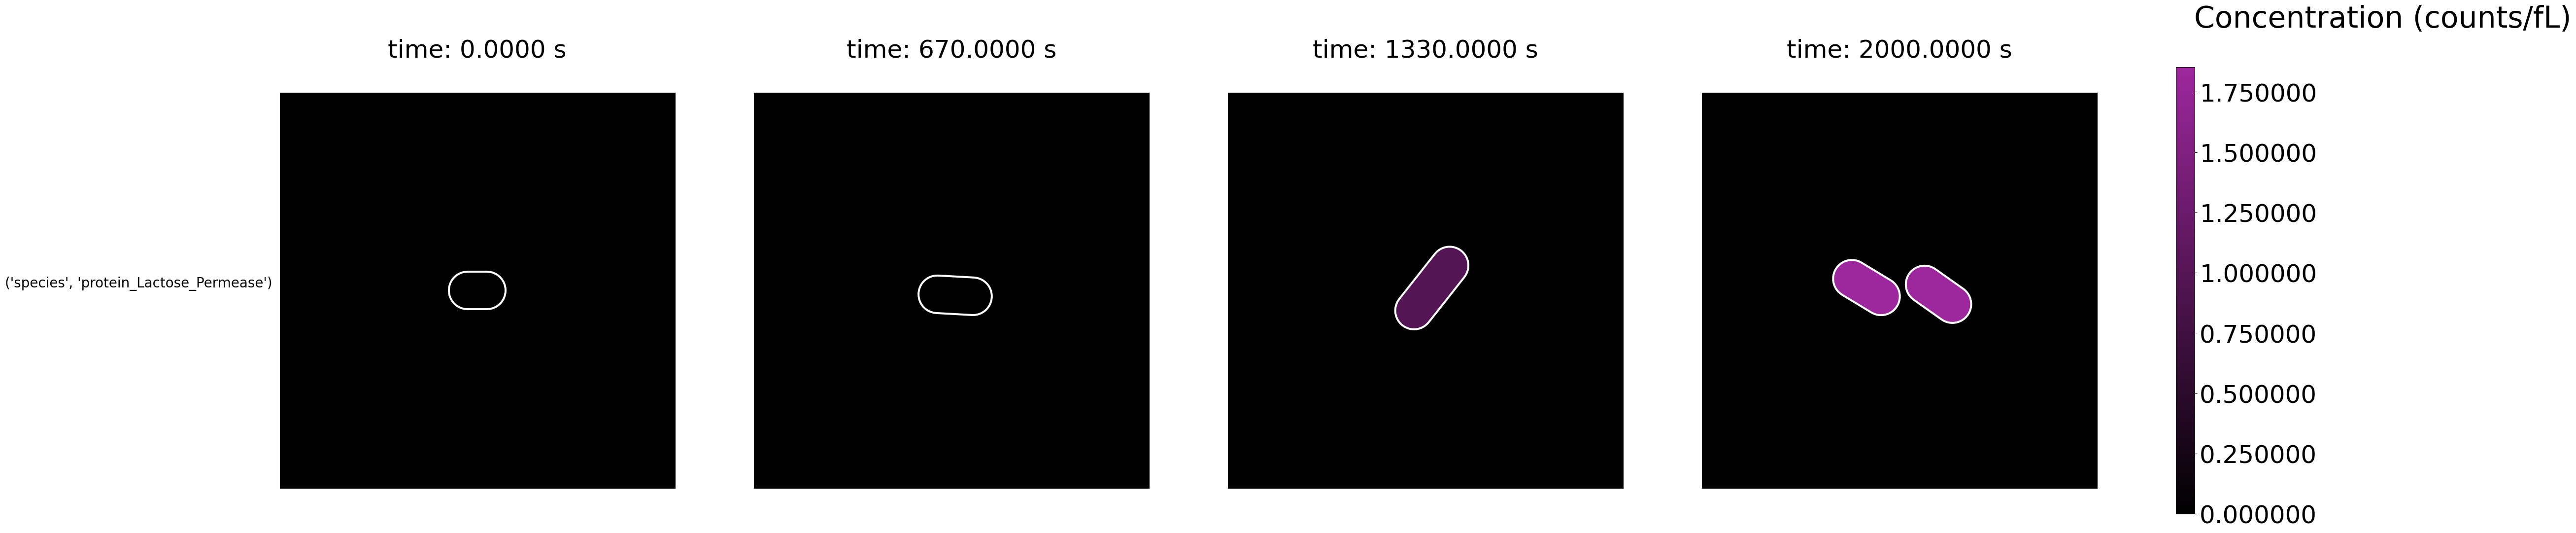

In [14]:
%matplotlib inline 
import pylab as plt
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_fields_snapshots, plot_fields_tags
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

from bioscrape_cobra import helper

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
bsc_composite = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config(division = True, spatial = True))

try:
    fig_topology = plot_topology(bsc_composite.generate(path=('agents', "0")))
    plt.show()
except:
    print(f"!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n{bsc_composite}\n\n!!!!!!!!!!!!!!!!!!\n")
    
#Simulate
bounds = [10, 10]
biocobra_data = simulate_bioscrape_cobra(
    total_time = 1000,
    initial_glucose=5, #mM
    initial_lactose=5, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 2, #maximum total cells to simulate
    bounds = bounds, #size of the lattice (microns)
    n_bins = [10, 10] , #number of lattice grid points
    output_type='unitless', 
    division = True,
    spatial = True)

fig_snapshots = plot_fields_snapshots(
    biocobra_data,
    bounds=bounds,
    include_fields=['Glucose_external', 'Lactose_external'])
plt.show()

fig_tags = plot_fields_tags(
    biocobra_data,
    bounds=bounds,
    tagged_molecules=[('species', 'protein_Lactose_Permease',)])
plt.show()

## 4.6 Bioscrape and COBRA in an Lineage of Stochastic Cells on a Lattice

In [15]:
%matplotlib inline
import pylab as plt
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_fields
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

from bioscrape_cobra import helper

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
bsc_composite = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config(division = True, spatial = True))

try:
    fig_topology = plot_topology(bsc_composite.generate(path=('agents', "0")))
except:
    print(f"!!!!!!!!!!!!!!!!!!\n\nCannot Plot This Topology\n\n{bsc_det_composite}\n\n!!!!!!!!!!!!!!!!!!\n")
    
#Simulate
bounds = [5, 5]
biocobra_data = simulate_bioscrape_cobra(
    total_time = 2500,
    initial_glucose= 5, #mM
    initial_lactose= 5, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #how total cells to simulate
    bounds = bounds, #size of the lattice (microns)
    n_bins = [10, 10] , #number of lattice grid points
    output_type='unitless', 
    division = True,
    spatial = True)

fig_snapshots = plot_fields_snapshots(
    biocobra_data,
    bounds=bounds,
    include_fields=['Glucose_external', 'Lactose_external'])
plt.show()

fig_tags = plot_fields_tags(
    biocobra_data,
    bounds=bounds,
    tagged_molecules=[('species', 'protein_Lactose_Permease',)])
plt.show()

ImportError: cannot import name 'plot_fields' from 'bioscrape_cobra.plot' (C:\Users\wp_ix\miniconda3\lib\site-packages\bioscrape_cobra-0.0.1-py3.8.egg\bioscrape_cobra\plot.py)